In [5]:
import pandas as pd
import numpy as np

## Load Event Data

In [2]:
types = {'session_id': np.uint64, 'event': 'category', 'event_timestamp': np.uint64,
         'event_value': 'float32', 'user_id_hash': 'category'}

In [3]:
data = pd.read_csv('events.csv', usecols=types.keys(), dtype=types)

In [4]:
data.count()

session_id         111946597
event              111946597
event_timestamp    111946597
event_value        111946534
user_id_hash       111946597
dtype: int64

## Only Keep Rows with Event Index 8

In [5]:
data.drop(data[data['event'] != '8' ].index , inplace=True);

In [6]:
data.head()

,session_id,event,event_timestamp,event_value,user_id_hash
279,5159335150551901701,8,1541912600211,3.493,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2898,845986603555615931,8,1543357433771,3.493,deaf54103e439789b069a95c4650dc6cdc24d6c9d700f1...
2970,2846996524173831068,8,1543023539172,3.493,deaf54103e439789b069a95c4650dc6cdc24d6c9d700f1...
3002,6141788581998894012,8,1543531139724,1.393,deaf54103e439789b069a95c4650dc6cdc24d6c9d700f1...
3597,6974128812803113234,8,1541437057644,1.393,b2ccdf1ae0d33e2e0a671d605f3fe4cdb72c7fc54bdd49...


In [7]:
print(f"Number of Rows: {len(data)}")

Number of Rows: 265034


In [8]:
unique_users = len(data['user_id_hash'].unique())
print(f"Number of Unique Users: {unique_users}")

Number of Unique Users: 34200


In [9]:
data.reset_index(inplace=True, drop=True);

## Save Filtered Event Dataframe

In [10]:
data.to_csv('filtered_events.csv', index=False);

## Load CSV Back into Dataframe - Start From Here if need to rerun stuff!

In [6]:
filtered_events = pd.read_csv('filtered_events.csv')
filtered_events.head()

,session_id,event,event_timestamp,event_value,user_id_hash
0,5159335150551901701,8,1541912600211,3.493,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,845986603555615931,8,1543357433771,3.493,deaf54103e439789b069a95c4650dc6cdc24d6c9d700f1...
2,2846996524173831068,8,1543023539172,3.493,deaf54103e439789b069a95c4650dc6cdc24d6c9d700f1...
3,6141788581998894012,8,1543531139724,1.393,deaf54103e439789b069a95c4650dc6cdc24d6c9d700f1...
4,6974128812803113234,8,1541437057644,1.393,b2ccdf1ae0d33e2e0a671d605f3fe4cdb72c7fc54bdd49...


## Load Total Users

In [7]:
users = pd.read_csv('sample_submission_2.csv')
users = users['user_id_hash']
print(f"Number of Total Unique Users: {len(users)}")

Number of Total Unique Users: 312568


Note that there are way more users we need to predict on than we actually have data for

## Convert UTC Epoch Time to human readable date

In [8]:
filtered_events['event_timestamp'] = pd.to_datetime(filtered_events['event_timestamp'], unit='ms')

In [9]:
filtered_events.head()

,session_id,event,event_timestamp,event_value,user_id_hash
0,5159335150551901701,8,2018-11-11 05:03:20.211,3.493,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,845986603555615931,8,2018-11-27 22:23:53.771,3.493,deaf54103e439789b069a95c4650dc6cdc24d6c9d700f1...
2,2846996524173831068,8,2018-11-24 01:38:59.172,3.493,deaf54103e439789b069a95c4650dc6cdc24d6c9d700f1...
3,6141788581998894012,8,2018-11-29 22:38:59.724,1.393,deaf54103e439789b069a95c4650dc6cdc24d6c9d700f1...
4,6974128812803113234,8,2018-11-05 16:57:37.644,1.393,b2ccdf1ae0d33e2e0a671d605f3fe4cdb72c7fc54bdd49...


In [10]:
print(f"Earliest Date: {filtered_events.event_timestamp.min()}")
print(f"Latest Date: {filtered_events.event_timestamp.max()}")

Earliest Date: 2018-10-01 07:35:42.211000
Latest Date: 2018-12-14 23:58:42.037000


## Save Data from Oct 1 - Nov 30 to form Training Set

In [11]:
training_set = filtered_events[filtered_events.event_timestamp < '2018-12-01'].copy()
print(f"Earliest Training Date: {training_set.event_timestamp.min()}")
print(f"Latest Training Date: {training_set.event_timestamp.max()}")
training_set.to_csv('training_events.csv', index=False);

Earliest Training Date: 2018-10-01 07:35:42.211000
Latest Training Date: 2018-11-30 23:59:42.541000


## Take Data from Dec 1 - Dec 14 to form Validation Set

In [12]:
validation_set = filtered_events[filtered_events.event_timestamp >= '2018-12-01'].copy()

In [13]:
print(f"Earliest Date: {validation_set.event_timestamp.min()}")
print(f"Latest Date: {validation_set.event_timestamp.max()}")

Earliest Date: 2018-12-01 00:00:42.221000
Latest Date: 2018-12-14 23:58:42.037000


### Take subset of validation_set to get data from Dec 1 through Dec 7

In [14]:
seven_days_data = validation_set[validation_set.event_timestamp < '2018-12-08'].copy()

In [15]:
print(f"Earliest Date: {seven_days_data.event_timestamp.min()}")
print(f"Latest Date: {seven_days_data.event_timestamp.max()}")

Earliest Date: 2018-12-01 00:00:42.221000
Latest Date: 2018-12-07 23:59:57.656000


In [16]:
print(f"Number of Total Unique Users in Validation Set: {len(validation_set['user_id_hash'].unique())}")
print(f"Number of Total Unique Users in 7 Day Sub Set: {len(seven_days_data['user_id_hash'].unique())}")
print(f"Number of Total Unique Users in Entire Filtered Events Set: {len(filtered_events['user_id_hash'].unique())}")

Number of Total Unique Users in Validation Set: 6126
Number of Total Unique Users in 7 Day Sub Set: 4729
Number of Total Unique Users in Entire Filtered Events Set: 34200


Note that only a small percentage of total users will be represented in the validation/holdout set

## Prepare Validation Labels

In [17]:
seven_days_data = seven_days_data.groupby('user_id_hash', as_index=False)['event_value'].sum()
seven_days_data['user_purchase_binary_7_days'] = seven_days_data['event_value'].apply(lambda x: 1 if x > 0 else 0)
seven_days_data.drop(columns=['event_value'], inplace=True);

In [18]:
fourteen_days_data = validation_set.groupby('user_id_hash', as_index=False)['event_value'].sum()
fourteen_days_data['user_purchase_binary_14_days'] = fourteen_days_data['event_value'].apply(lambda x: 1 if x > 0 else 0)
fourteen_days_data.drop(columns=['event_value'], inplace=True);

In [19]:
validation_labels = pd.merge(users, seven_days_data, how='left', on='user_id_hash')

In [20]:
validation_labels = pd.merge(validation_labels, fourteen_days_data, how='left', on='user_id_hash')

In [21]:
validation_labels.fillna(0, inplace=True);

In [22]:
validation_labels.head()

,user_id_hash,user_purchase_binary_7_days,user_purchase_binary_14_days
0,e469dfaed039ead9110165d9bc457acb11609ca34057dc...,0.0,0.0
1,afcc639a324b6c598ef83d360450afa011cb2dd1358bf9...,0.0,0.0
2,fd5a7cf211d08e3e00f7be6a9df6e6ea3d2e5c22a5d9c3...,0.0,0.0
3,00bfff98b9d0329f014c2eeac7ce47cd18b2bc6e10d608...,0.0,0.0
4,0d298f3638c43e915c119d4935e1ce8d168f81b5e3e8c1...,0.0,0.0


In [23]:
validation_labels.to_csv('validation.csv', index=False);

## Events EDA

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
x = ['Dec 1 - Dec 14', 'Dec 1 - Dec 7', 'Oct 1 - Dec 14']

In [24]:
counts = [len(fourteen_days_data['user_id_hash'].unique()), 
          len(seven_days_data['user_id_hash'].unique()), 
          len(filtered_events['user_id_hash'].unique())]

In [25]:
x_pos = [i for i, _ in enumerate(x)]

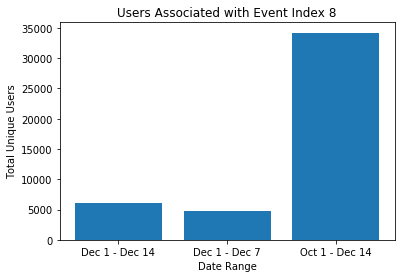

In [26]:
plt.bar(x_pos, counts)
plt.xlabel("Date Range")
plt.ylabel("Total Unique Users")
plt.xticks(x_pos, x)
plt.title("Users Associated with Event Index 8")
plt.show()

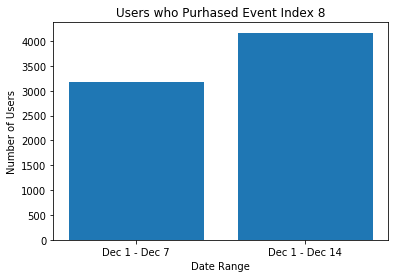

In [35]:
x = ['Dec 1 - Dec 7', 'Dec 1 - Dec 14']
counts = [validation_labels['user_purchase_binary_7_days'].sum(), validation_labels['user_purchase_binary_14_days'].sum()]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, counts)
plt.xlabel("Date Range")
plt.ylabel("Number of Users")
plt.xticks(x_pos, x)
plt.title("Users who Purhased Event Index 8")
plt.show()

In [36]:
before_validation_set = filtered_events[filtered_events.event_timestamp < '2018-12-01'].copy()

In [37]:
users_purchased_validation = labels[labels.user_purchase_binary_14_days == 1]['user_id_hash']

In [38]:
users_who_purchased_before = before_validation_set[before_validation_set.user_id_hash.isin(users_purchased_validation)].copy()

In [39]:
num_users = len(users_who_purchased_before.user_id_hash.unique())

In [46]:
print(f"Number of Users from October 1 - Nov 30 that also purchased (index 8) on Dec 1- Dec 14: {num_users}")

Number of Users from October 1 - Nov 30 that also purchased (index 8) on Dec 1- Dec 14: 17642


In [47]:
print(f"Total Number of users who purchased: {labels.user_purchase_binary_14_days.sum()}")

Total Number of users who purchased: 18612.0
